In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.svm import SVC
from scipy import stats
import seaborn as sns
import numpy as np

## 1. Data specification (2 pts)

1.1 Describe where you got the data
Downloaded the data from: https://www.kaggle.com/c/predict-volcanic-eruptions-ingv-oe/data

1.2 How was the data collected?

We have two files - train.csv which has :

a) segment_id: ID code for the data segment. Matches the name of the associated data file. Each file contains 10  minutes of logs from 10 different sensors configured around a volcano. The readings have been normalized within each segment.

b) time_to-eruption: The target value, the time until the next eruption. 

 

1.3 Describe the data: what is the data about? what are the types?
Input x - Time series data from 10 sensors
Target y - Time to eruption-the time until the next eruption(in centiseconds - 1/100th of a second)

1.4 Put a testing set aside and do not look at it before you test your model. Split the rest of the data into a training set and a validation set. 

<< TO DO >>

1.5 Do they follow the same distribution? Use a Q-Q plot to show their relations. 
Note: if the input x is a vector with more than three elements, please only choose three values from x to show the distribution.

<< TO DO >>


In [22]:
# Splitting the data into n_splits=10 folds using Kfold

'''def split_test_train(data):
    #kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
    kf = KFold(n_splits = 3, shuffle = True, random_state = 1)

    result = next(kf.split(df), None)
    df_train = df.iloc[result[0]]
    df_test = df.iloc[result[1]]
    print("train data ->", df_train )
    print("test data ->", df_test)
    return df_train, df_test
'''

'def split_test_train(data):\n    #kf = KFold(n_splits = 10, shuffle = True, random_state = 1)\n    kf = KFold(n_splits = 3, shuffle = True, random_state = 1)\n\n    result = next(kf.split(df), None)\n    df_train = df.iloc[result[0]]\n    df_test = df.iloc[result[1]]\n    print("train data ->", df_train )\n    print("test data ->", df_test)\n    return df_train, df_test\n'

## 2. Define a problem
In this problem we are aiming to classify the time to eruption interval (less than a day or more) given the sound signals received from the sensors configured around Mount Etna. 

## 3. Descriptive analysis

In [23]:
# Read the csv file containing the segment_ids and time_of_eruption
df = pd.read_csv("../../predict-volcanic-eruptions-ingv-oe/train.csv")
df.head()


,segment_id,time_to_eruption
0,1002575641,9924307
1,1001732002,20549733
2,1002624617,8004890
3,1000554676,6347792
4,1000015382,16258654


In [320]:
# Do they follow the same distribution? Use a Q-Q plot to show their relations.
#sm.qqplot(df_test["time_to_eruption"],fit=True, line="45")
#sm.qqplot(df_train["time_to_eruption"],fit=True, line="45")

### 3.1 Show the histogram of some selected variables and describe what you conclude.

This distribution looks closer to Uniform distribution 
### INCREASE BINS WHEN ENTIRE DATA IS LOADED.

Text(0, 0.5, 'Frequency')

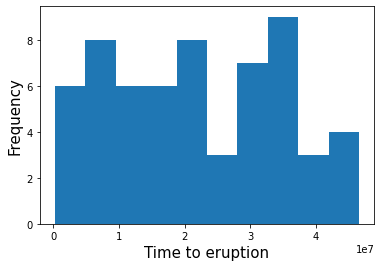

In [30]:
# Plotting the histogram with time to eruption data

fig = plt.hist(df["time_to_eruption"], bins=10)
plt.xlabel('Time to eruption', size=15)
plt.ylabel('Frequency', size=15)


### 3.2 Show the dependence of some selected variables and describe what you conclude.

For each segment_id there is an associated file containing sound signals from 10 different sensors. Each file conatins data for 10 consective minutes. We are trying to see if there is any correlation between these 10 sensors.

Observation: As per below correlation matrix these sensors are not at all related.

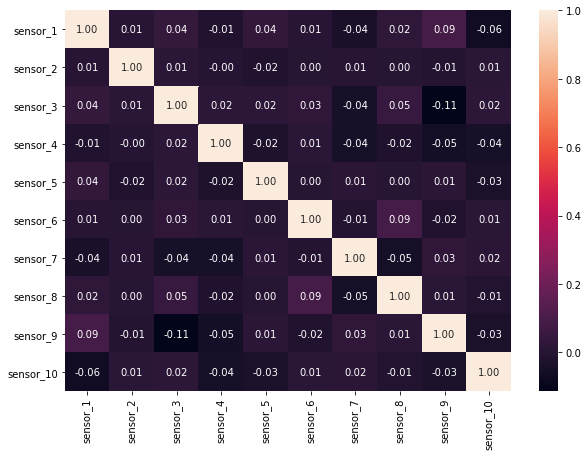

In [39]:
# Reading the first segment id file containing sensor data and plotting heatmap

seg_id = df['segment_id'][0]
df_seg_id = pd.read_csv("../../predict-volcanic-eruptions-ingv-oe/train/"+str(seg_id)+".csv")

fig = plt.figure(figsize=(10,7))
sns.heatmap(df_seg_id.corr(),annot=True,fmt=".2f");

# Observation: There is no correlation between the sensors

### 3.3 Describe the data using its range, sample mean, sample standard deviation and some quantiles.

### << TO DO when entire data is loaded >>

In [31]:
df.describe()

,segment_id,time_to_eruption
count,6.000000e+01,6.000000e+01
mean,1.009480e+09,2.193887e+07
std,6.510083e+06,1.334594e+07
min,1.000015e+09,2.133900e+05
25%,1.003072e+09,9.863381e+06
50%,1.009596e+09,2.197993e+07
75%,1.015048e+09,3.369749e+07
max,1.022421e+09,4.662941e+07


### 3.4 Choose a visualization method to explore the data set.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1AFF2EF10>,
      dtype=object)

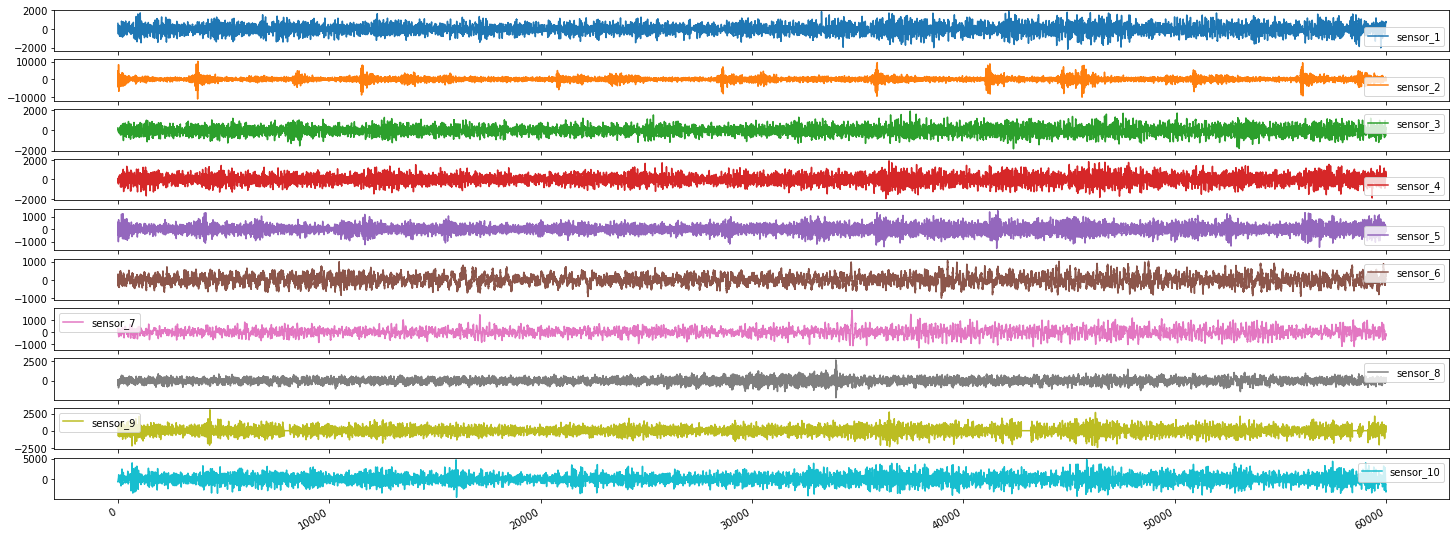

In [40]:
# Reading a segment file and plotting the signals from 10 sensors

df_seg_id.fillna(0).plot(subplots=True, figsize=(25, 10))

### 3.5 Explain how your analysis relates to the objective of your project, i.e. why are these selected variables important?

The selected variables in this case are the time-series data from 10 sensors. There exist a pattern between them and the time_of_eruption which we need to identify and thus segregate them into two categories where time_of_eruption is less than a day and the one where its more than a day.
### << EXPLAIN MORE...>>

## 4. Probability Distribution 

### 4.1 Use probability distributions to describe some selected variables.

We can see that the Sensor_data looks very gaussian and balanced


### 4.2 What are the parameters in the distribution? Estimate these parameters.

The parameters are mean(mu) and standard deviation (sigma).
Below plot shows the signal at the median and mean around 0. 

Mean  -2.1006983216946384
Median  0.0
Std dev  287.8894570716581


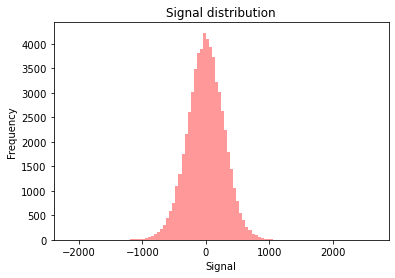

In [52]:
# Reading sensor_1 data from first segment id file and plotting the histogram

sensor_data = df_seg_id['sensor_1']
ax=sns.distplot(sensor_data, kde = False, color ='red', bins = 100)
ax.set_xlabel("Signal")
ax.set_ylabel("Frequency")
ax.set_title("Signal distribution");

print("Mean ",sensor_data.mean())
print("Median ",sensor_data.median())
print("Std dev ", sensor_data.std())


### 4.3 Use hypothesis testing to show some interesting conclusions.

### << TO DO >>

## 5. Predictive Analysis

### 5.1 Apply two predictive machine learning models to solve your problem.

Using SVM technique to classify the class for the time_of_eruption considering two classes:
class A : with time_of_eruption <= 1 day
class B : with time_of_eruption > 1 day

In [56]:
# Added new column to display days_to_eruption by converting time in centiseconds to days
df['days_to_eruption']=df['time_to_eruption']/(100*60*60*24)
df.head()


,segment_id,time_to_eruption,days_to_eruption
0,1002575641,9924307,1.148647
1,1001732002,20549733,2.378441
2,1002624617,8004890,0.926492
3,1000554676,6347792,0.734698
4,1000015382,16258654,1.881789


In [58]:
# Check how many segment ids have less or equal to 1 day to eruption
df[df['days_to_eruption']<=1].count()

segment_id          13
time_to_eruption    13
days_to_eruption    13
dtype: int64

In [59]:
# Check how many segment ids have more than 1 day to eruption
df[df['days_to_eruption']>1].count()


segment_id          47
time_to_eruption    47
days_to_eruption    47
dtype: int64

In [63]:
# Create a new column to identify two classes based on the days of eruption
# 'A' for days_to_eruption <=1
# 'B' for days_to_eruption >1
df['class']=df['days_to_eruption'].apply(lambda x: "A" if x <= 1 else "B" )
df.head()


,segment_id,time_to_eruption,days_to_eruption,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,class
0,1002575641,9924307,1.148647,1.660156,-0.765154,-1.923518,-2.828936,B
1,1001732002,20549733,2.378441,0.904102,-4.544324,-1.232763,0.521858,B
2,1002624617,8004890,0.926492,3.318545,-10.278162,0.667139,-4.288379,A
3,1000554676,6347792,0.734698,-3.828120,7.063966,-1.944734,4.876319,A
4,1000015382,16258654,1.881789,0.382244,2.266563,2.192213,-0.148031,B


In [64]:
# As observed in section #4 the sensor data is taken from gaussian distribution hence we are using mean to represent 
# their data. Using sensor_1_mean, sensor_2_mean, sensor_3_mean and sensor_4_mean as features from segment files

index=0
for seg_id in df['segment_id']:
    df_seg_id = pd.read_csv("../../predict-volcanic-eruptions-ingv-oe/train/"+str(int(seg_id))+".csv")
    #print(seg_id, sensor_1_mean)
    df.loc[index,'sensor_1_mean'] = df_seg_id['sensor_1'].mean(axis = 0)
    df.loc[index,'sensor_2_mean'] = df_seg_id['sensor_2'].mean(axis = 0)
    df.loc[index,'sensor_3_mean'] = df_seg_id['sensor_3'].mean(axis = 0)
    df.loc[index,'sensor_4_mean'] = df_seg_id['sensor_4'].mean(axis = 0)
    index+=1
df=df.fillna(0)
df.head()

,segment_id,time_to_eruption,days_to_eruption,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,class
0,1002575641,9924307,1.148647,1.660156,-0.765154,-1.923518,-2.828936,B
1,1001732002,20549733,2.378441,0.904102,-4.544324,-1.232763,0.521858,B
2,1002624617,8004890,0.926492,3.318545,-10.278162,0.667139,-4.288379,A
3,1000554676,6347792,0.734698,-3.828120,7.063966,-1.944734,4.876319,A
4,1000015382,16258654,1.881789,0.382244,2.266563,2.192213,-0.148031,B


In [66]:
# Seperating two classes into 2 dataframes
df_A = df[df['class']=='A']
df_B = df[df['class']=='B']
df_A.head()

,segment_id,time_to_eruption,days_to_eruption,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,class
2,1002624617,8004890,0.926492,3.318545,-10.278162,0.667139,-4.288379,A
3,1000554676,6347792,0.734698,-3.828120,7.063966,-1.944734,4.876319,A
5,1002789083,7581131,0.877446,3.518091,-1.719305,2.534224,-5.667889,A
7,1000745424,5120693,0.592673,8.291928,-1.646423,-1.328611,-10.412410,A
12,1002624617,8004890,0.926492,3.318545,-10.278162,0.667139,-4.288379,A


In [67]:
df_B.head()

,segment_id,time_to_eruption,days_to_eruption,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,class
0,1002575641,9924307,1.148647,1.660156,-0.765154,-1.923518,-2.828936,B
1,1001732002,20549733,2.378441,0.904102,-4.544324,-1.232763,0.521858,B
4,1000015382,16258654,1.881789,0.382244,2.266563,2.192213,-0.148031,B
6,1001461087,10393161,1.202912,2.071582,1.194780,-4.365761,3.556874,B
8,1002609771,44906449,5.197506,-0.039533,-2.755154,0.000000,0.118098,B


In [99]:
# Plotting class A
#plt.scatter(df_A['sensor_1_mean'],df0['sensor_2_mean'],color='blue',marker='+')

#Plotting class B
#plt.scatter(df_B['sensor_1_mean'],df1['sensor_2_mean'],color='red',marker='.')
#plt.show()

In [70]:
# Dropping all columns except the sensor_data which will be used for training the SVM model
# Input X
X=df.drop(['segment_id','time_to_eruption','days_to_eruption','class'], axis='columns')
X.head()

,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean
0,1.660156,-0.765154,-1.923518,-2.828936
1,0.904102,-4.544324,-1.232763,0.521858
2,3.318545,-10.278162,0.667139,-4.288379
3,-3.828120,7.063966,-1.944734,4.876319
4,0.382244,2.266563,2.192213,-0.148031


In [71]:
# Target variable - class A or B
# Target y
y=df['class']
y.head()

0    B
1    B
2    A
3    A
4    B
Name: class, dtype: object

In [141]:
# Splitting the data into train and test.
# NEED TO FURTHER DIVIDE INTO VALIDATION SET WHEN ENTIRE DATA SET IS USED...

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
print(len(X_train),len(X_test))

48 12


## 5.2 For each model, state the following:

### What is the name of the model?

SVM - Support Vector Machine is a set of supervised learning method used for classification, Regression and outlier detection. It is effective in high dimension spaces. It looks at the data and divided it into 2 or more categories.

### What is the mathematical expression of the model?


### What are the hyperparameters?


### What are the parameters? 
C - It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of C means we will get more training points correctly. By default its 1.
 
gamma - It defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [142]:
# Fitting the training data into the SVC model
model=SVC()
model.fit(X_train,y_train)
# Calculating the score for test data
model.score(X_test, y_test)

0.8333333333333334


### What is the name of the model?

Naive Bayes classifier

### What is the mathematical expression of the model?


### What are the hyperparameters?


### What are the parameters? 


In [138]:
model= GaussianNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9166666666666666

In [139]:
# Verifying the target values
y_test[0:10]

5     A
33    B
45    B
31    B
43    B
55    B
34    B
49    A
40    B
26    B
Name: class, dtype: object

In [130]:
# Veryfying the predicted values
model.predict(X_test[0:10])

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A'], dtype=object)

In [77]:
from scipy.fftpack import fft

In [90]:
seg_ids=[]
for seg_id in df['segment_id']:
    df_seg_id = pd.read_csv("../../predict-volcanic-eruptions-ingv-oe/train/"+str(int(seg_id))+".csv")
    df_seg_id['sensor_1']
    print(seg_id)
    seg_ids.append(df_seg_id)

#print(seg_ids)

1002575641
1001732002
1002624617
1000554676
1000015382
1002789083
1001461087
1000745424
1002609771
1002275321
1002575641
1002609771
1002624617
1002789083
1002825126
1003154738
1003175827
1003411703
1003520023
1004346803
1004557332
1004561781
1004609129
1005472094
1006345280
1006842231
1007019534
1007996426
1009126824
1009442335
1009749143
1010002096
1010561361
1010680130
1010725931
1010756593
1010864137
1011078321
1011133267
1013196130
1013226239
1013789689
1014562599
1014585637
1015033166
1015092282
1016110949
1016242026
1016727429
1016932159
1016956864
1017830158
1018207090
1018435910
1018756523
1019052648
1019955915
1020283272
1021479157
1022420757
[       sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0         605.0   -3961.0     247.0      79.0    -469.0     124.0      36.0   
1         587.0   -3007.0     237.0      28.0    -406.0     112.0      85.0   
2         546.0   -1937.0     235.0     -20.0    -329.0     108.0     107.0   
3         514.0    -947

In [120]:
x = pd.Series(seg_ids[1]['sensor_1'], dtype='int')
print(x)

0       -573
1       -540
2       -525
3       -514
4       -515
        ... 
59996     73
59997     95
59998    130
59999    158
60000    186
Name: sensor_1, Length: 60001, dtype: int32


freq [ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
ampl [1084.94         69.24851657   35.26652368   62.4600621   112.03293712
  134.8214397   163.62150641  177.76739864  625.29458279  548.26796068
  270.95642193  268.05277045  307.19148762 1018.46370297  694.9296783
  419.97409117  486.57128403  765.89410087  188.2313428   646.7195118
  443.58481097  535.78886162  392.08854661  197.11958905  249.6451771
  400.26510704  216.14191568 

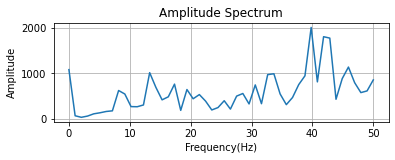

In [121]:
Fs = 100 # Sampling frequency
t = np.arange(0,1,1/Fs)

# Generate frequency axis
n = np.size(t)
fr = (Fs/2)*np.linspace(0,1,int(n/2))

# Compute FFT 
X = fft(x)
X_a = (2/n)*abs(X[0:np.size(fr)])
print("freq",fr)
print("ampl",X_a)

plt.subplot(2,1,2)
plt.plot(fr,X_a)
plt.xlabel('Frequency(Hz)') 
plt.ylabel('Amplitude')
plt.grid('on')

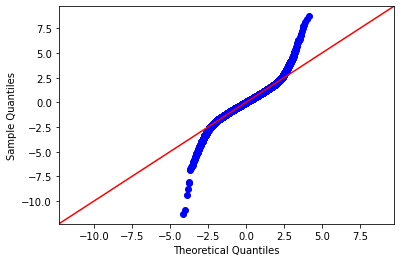

In [9]:
# Mean sensor data for each row

sensor_mean = df_1.mean(axis = 1) 
sm.qqplot(sensor_mean,fit=True, line="45")
plt.show()

# As the QQ plot depicts straight line this appears to be normally distributed data

In [10]:
# Explain how your analysis relates to the objective of your project, i.e. why are these selected variables important? 
print(sensor_mean)

0         61.9
1        123.9
2        160.1
3        144.6
4        119.9
         ...  
59996    192.1
59997    176.1
59998    129.6
59999     91.8
60000     57.0
Length: 60001, dtype: float64


Mean  0.576494465832972
Median  0.6
Std dev  89.22392572006876


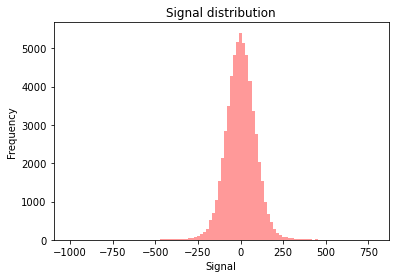

In [ ]:
Trends between max of each sensor data and time_to_eruption.
Trends between minimum of each sensor data and time_to_eruption.
Trends between mean of each sensor data and time_to_eruption.
Trends between variance of each sensor data and time_to_eruption.


Each_sensor max:
 sensor_1      1893.0
sensor_2     10216.0
sensor_3      1928.0
sensor_4      1898.0
sensor_5      1475.0
sensor_6      1060.0
sensor_7      1840.0
sensor_8      2642.0
sensor_9      3040.0
sensor_10     4768.0
dtype: float64

Each sensor min:
 sensor_1     -2176.0
sensor_2    -11197.0
sensor_3     -1826.0
sensor_4     -1968.0
sensor_5     -1536.0
sensor_6     -1002.0
sensor_7     -1346.0
sensor_8     -2158.0
sensor_9     -2448.0
sensor_10    -4497.0
dtype: float64
time_to_eruption Series([], Name: time_to_eruption, dtype: int64)


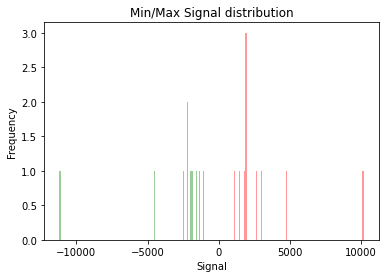

,Max_signal,Min_signal
sensor_1,1893.0,-2176.0
sensor_2,10216.0,-11197.0
sensor_3,1928.0,-1826.0
sensor_4,1898.0,-1968.0
sensor_5,1475.0,-1536.0
sensor_6,1060.0,-1002.0
sensor_7,1840.0,-1346.0
sensor_8,2642.0,-2158.0
sensor_9,3040.0,-2448.0
sensor_10,4768.0,-4497.0


In [313]:
# Mean sensor data for each sensor column
df_1 = pd.read_csv("../../predict-volcanic-eruptions-ingv-oe/train/1002575641.csv")
each_sensor_max = df_1.max(axis = 0) 

each_sensor_min = df_1.min(axis = 0) 
print("Each_sensor max:\n",each_sensor_max)
print("\nEach sensor min:\n",each_sensor_min)

#df_train.info()
time_to_eruption = df_train.loc[df_train['segment_id']== 1000015382, 'time_to_eruption']
#time_to_eruption = df_train.loc[df_train['segment_id']== 1000745424, 'time_to_eruption']
print("time_to_eruption",time_to_eruption)

ax=sns.distplot(each_sensor_max, kde = False, color ='red', bins = 100)
ax=sns.distplot(each_sensor_min, kde = False, color ='green', bins = 100)
ax.set_xlabel("Signal")
ax.set_ylabel("Frequency")
ax.set_title("Min/Max Signal distribution");
plt.show()

frame = { 'Max_signal': each_sensor_max, 'Min_signal': each_sensor_min } 
df_new=pd.DataFrame(frame)
df_new.head(10)


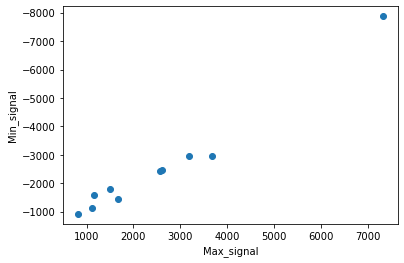

In [13]:

plt.scatter(df_new['Max_signal'], df_new['Min_signal'])
plt.xlabel('Max_signal')
plt.ylabel('Min_signal')
plt.gca().invert_yaxis()
plt.show()



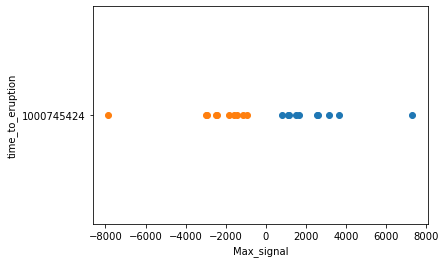

In [14]:

df_new['time_to_eruption'] = "1000745424"
df_new.head()

plt.scatter(df_new['Max_signal'], df_new['time_to_eruption'])
plt.scatter(df_new['Min_signal'], df_new['time_to_eruption'])
plt.xlabel('Max_signal')
plt.ylabel('time_to_eruption')
plt.show()